In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from tqdm import tnrange
from sklearn.metrics import explained_variance_score


# Panel C

In [16]:
dend = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy").reshape(4,1000,50001)[:,-1,:50000]
soma = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[-1,:50000]
soma_ap = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-1,:50000]
soma_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[-1,:50000]

ap_true_coinc = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/ap_true/coinc_4ms_15v.npy")
na_true_coinc = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/na_true/coinc_4ms_15v.npy")
nona_true_coinc = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/nona_true/coinc_4ms_15v.npy")

In [17]:
length = 50000
ap_true_active = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/ap_true/gru_l20_h40_0.2ms_test.npy").flatten()
na_true_active = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/na_true/gru_l20_h40_0.2ms_test.npy").flatten()
nona_true_active = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/nona_true/gru_l20_h40_0.2ms_test.npy").flatten()
spk_active = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/data/spike_train_0.2ms.npy")[980*50000:].flatten()

prec_ap_true_active, rec_ap_true_active, _ = precision_recall_curve(spk_active, ap_true_active)
prec_na_true_active, rec_na_true_active, _ = precision_recall_curve(spk_active, na_true_active)
prec_nona_true_active, rec_nona_true_active, _ = precision_recall_curve(spk_active, nona_true_active)

prarea_ap_true_active_array = np.zeros((20))
prarea_na_true_active_array = np.zeros((20))
prarea_nona_true_active_array = np.zeros((20))

for i in tnrange(20):
    part_prec_ap_true_active, part_rec_ap_true_active, _ = precision_recall_curve(spk_active[i*length:(i+1)*length], ap_true_active[i*length:(i+1)*length])
    part_prec_na_true_active, part_rec_na_true_active, _ = precision_recall_curve(spk_active[i*length:(i+1)*length], na_true_active[i*length:(i+1)*length])
    part_prec_nona_true_active, part_rec_nona_true_active, _ = precision_recall_curve(spk_active[i*length:(i+1)*length], nona_true_active[i*length:(i+1)*length])
    
    prarea_ap_true_active_array[i] = metrics.auc(part_rec_ap_true_active, part_prec_ap_true_active)
    prarea_na_true_active_array[i] = metrics.auc(part_rec_na_true_active, part_prec_na_true_active)
    prarea_nona_true_active_array[i] = metrics.auc(part_rec_nona_true_active, part_prec_nona_true_active)
    

/tmp/ipykernel_16190/3232230564.py:15: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(20):


  0%|          | 0/20 [00:00<?, ?it/s]

/tmp/ipykernel_16190/2978747260.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


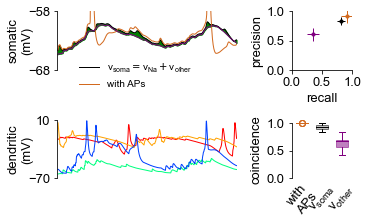

In [38]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '13'

fig = plt.figure(constrained_layout=True, figsize = (5,3))
gs = fig.add_gridspec(2,4, wspace=0.15, hspace=0.1)
ax1 = fig.add_subplot(gs[0,:3])
ax2 = fig.add_subplot(gs[0,3])
ax3 = fig.add_subplot(gs[1,:3])
ax4 = fig.add_subplot(gs[1,3])

ax1.plot(soma[22500:23500], color="black", linewidth=1, label="$\mathregular{v_{soma}} = \mathregular{v_{Na}}+\mathregular{v_{other}}$")
ax1.plot(soma_ap[22500:23500], color="chocolate", linewidth=1, label="with APs")
ax1.plot(soma_nona[22500:23500], color="purple", linewidth=1)
ax1.fill_between(np.arange(1000), soma[22500:23500], soma_nona[22500:23500], color="green")
ax1.set_ylim(-68,-58)
ax1.set_yticks([-68,-58])
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.spines.bottom.set_visible(False)
ax1.set_xticks([])
ax1.set_ylabel("somatic\n(mV)", labelpad=-5)
ax1.legend(loc=(0.1,-0.4), fontsize=10, frameon=False)
ax1.margins(x=0.005, y=0.005)

ax3.plot(dend[0][22500:23500], color="#ff0000", linewidth=1, label="Cluster 1")
ax3.plot(dend[1][22500:23500], color="#ffa200", linewidth=1, label="Cluster 2")
ax3.plot(dend[2][22500:23500], color="#00ff80", linewidth=1, label="Cluster 3")
ax3.plot(dend[3][22500:23500], color="#0040ff", linewidth=1, label="Cluster 4")
ax3.margins(x=0.005, y=0.005)
ax3.spines.right.set_visible(False)
ax3.spines.top.set_visible(False)
ax3.spines.bottom.set_visible(False)
ax3.spines.left.set_bounds(-70,10)
ax3.set_ylabel("dendritic\n(mV)", labelpad=-5)
ax3.set_xticks([])
ax3.set_yticks([-70,10])

ax2.scatter(0.9156042360417361, 0.9156042360417361, color="chocolate", s=10)
ax2.scatter(0.8143590159840158, 0.8386963383838383, color="black", s=10)
ax2.scatter(0.34974221611721606, 0.6056746031746031, color="purple", s=10)
ax2.errorbar(0.9156042360417361, 0.9156042360417361, xerr=0.0940514647548976, yerr=0.11510389858903808,
             color="chocolate", linewidth=1)
ax2.errorbar(0.8143590159840158, 0.8386963383838383, xerr=0.06843242335670274, yerr=0.06615087825324792,
             color="black", linewidth=1)
ax2.errorbar(0.34974221611721606, 0.6056746031746031, xerr=0.0940514647548976, yerr=0.11510389858903808,
             color="purple", linewidth=1)
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)
ax2.set_xticks([0,0.5,1])
ax2.set_yticks([0,0.5,1])
ax2.set_xlabel("recall")
ax2.set_ylabel("precision")

coinc = np.zeros((20,3))
coinc[:,0] = ap_true_coinc
coinc[:,1] = na_true_coinc
coinc[:,2] = nona_true_coinc
bp = ax4.boxplot(coinc, widths = 0.6, patch_artist=True)
bp['boxes'][0].set_facecolor("chocolate")
bp['boxes'][1].set_facecolor("gray")
bp['boxes'][2].set_facecolor("purple")
bp['boxes'][0].set_alpha(0.5)
bp['boxes'][1].set_alpha(0.5)
bp['boxes'][2].set_alpha(0.5)
bp['medians'][0].set_color("chocolate")
bp['medians'][1].set_color("black")
bp['medians'][2].set_color("purple")
for element in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bp[element][0], color="chocolate")
plt.setp(bp["fliers"][0], markeredgecolor="chocolate")

#for element in ['boxes', 'fliers', 'medians']:
    #plt.setp(bp[element][2], color="purple")
#plt.setp(bp["fliers"][2], markeredgecolor="purple")
plt.setp(bp["whiskers"][0], color="chocolate")
plt.setp(bp["whiskers"][1], color="chocolate")
plt.setp(bp["caps"][0], color="chocolate")
plt.setp(bp["caps"][1], color="chocolate")
plt.setp(bp["boxes"][0], edgecolor="chocolate")
plt.setp(bp["whiskers"][4], color="purple")
plt.setp(bp["whiskers"][5], color="purple")
plt.setp(bp["caps"][4], color="purple")
plt.setp(bp["caps"][5], color="purple")
plt.setp(bp["boxes"][2], edgecolor="purple")

ax4.spines.right.set_visible(False)
ax4.spines.top.set_visible(False)
ax4.spines.bottom.set_visible(False)
ax4.spines.left.set_bounds(0,1)
ax4.tick_params(axis="x", length=0)
ax4.set_yticks([0,0.5,1])
ax4.set_ylim(0,1.05)
ax4.set_ylabel("coincidence")
ax4.set_xticklabels(["with\nAPs",
            "$\mathregular{v_{soma}}$",
                    "$\mathregular{v_{other}}$"], rotation=50)

fig.tight_layout()
#plt.show()
fig.savefig("/home/sklee/dendrite/fig_cosyne/fig_cosyne_c.pdf", bbox_inches="tight", transparent=True)

# Panel D

In [6]:
true4_na_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy"))
true4_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[-20:,:50000]

one4_na_test = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h1_output.npz")["test"] + true4_na_mean
two4_na_test = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/glm_s10_h2_output.npz")["test"] + true4_na_mean
gru4_na_test = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/gru_s10_h20_output.npz")["test"] + true4_na_mean

one4_error = true4_na - one4_na_test
two4_error = true4_na - two4_na_test
gru4_error = true4_na - gru4_na_test
diff4 = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff_stimseed1_set1.npy")[-20*50000:].reshape(-1,50000)

var_exp_array = np.zeros((3,20))

for i in range(20):
    var_exp_array[0,i] = explained_variance_score(true4_na[i], one4_na_test[i])
    var_exp_array[1,i] = explained_variance_score(true4_na[i], two4_na_test[i])
    var_exp_array[2,i] = explained_variance_score(true4_na[i], gru4_na_test[i])

/tmp/ipykernel_16729/174004990.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


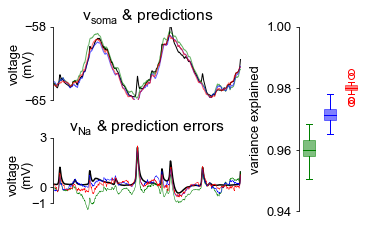

In [28]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '13'

fig = plt.figure(constrained_layout=True, figsize = (5,3))
gs = fig.add_gridspec(2,4, wspace=0.1, hspace=0.05)
ax1 = fig.add_subplot(gs[0,:3])
ax2 = fig.add_subplot(gs[1,:3])
ax3 = fig.add_subplot(gs[:,3])

ax1.plot(np.arange(0,0.3,1/5000), true4_na[-2][23000:24500], linewidth=1, color="black", label="target")
ax1.plot(np.arange(0,0.3,1/5000), one4_na_test[-2][23000:24500], linewidth=1, color="green", label="static", alpha=0.6)
ax1.plot(np.arange(0,0.3,1/5000), two4_na_test[-2][23000:24500], linewidth=1, color="blue", label="static w/ multiplex", alpha=0.6)
ax1.plot(np.arange(0,0.3,1/5000), gru4_na_test[-2][23000:24500], linewidth=1, color="red", label="dynamic", alpha=0.6)
ax1.margins(x=0.005, y=0.005)
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.spines.bottom.set_visible(False)
ax1.set_xticks([])
ax1.set_yticks([-65,-58])
ax1.set_ylim(-65,-58)
ax1.set_ylabel("voltage\n(mV)", labelpad=-10)
ax1.set_title("$\mathregular{v_{soma}}$ & predictions")

ax2.plot(np.arange(0,0.3,1/5000), diff4[-2][23000:24500], linewidth=1.5, color="black", label="target")
ax2.plot(np.arange(0,0.3,1/5000), one4_error[-2][23000:24500], linewidth=0.5, color="green", label="static error")
ax2.plot(np.arange(0,0.3,1/5000), two4_error[-2][23000:24500], linewidth=0.5, color="blue", label="static w/ multiplex error")
ax2.plot(np.arange(0,0.3,1/5000), gru4_error[-2][23000:24500], linewidth=0.5, color="red", label="dynamic error")
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2.set_xticks([])
ax2.set_ylim(-1.5,3)
ax2.spines.left.set_bounds((-1, 3))
ax2.set_yticks([-1,0,3])
ax2.set_ylabel("voltage\n(mV)", labelpad=-2)
ax2.margins(x=0.005, y=0.005)
ax2.set_title("$\mathregular{v_{Na}}$ & prediction errors")

# first boxplot pair
colors = ["green", "blue", "red"]
cap_colors = ["green", "green", "blue", "blue", "red", "red"]
bp = ax3.boxplot(var_exp_array.T, positions = [1,2,3], widths = 0.6, patch_artist=True)
for i in range(var_exp_array.shape[0]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(var_exp_array.shape[0]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
    
ax3.set_ylim(0.94,1)
ax3.set_xticks([])
ax3.tick_params(axis="x", length=0)
#ax3.set_xticklabels(["4", "8", "12"])
#ax3.set_xlabel("no. clusters")
ax3.set_ylabel("variance explained")
ax3.margins(x=0.005, y=0.005)
ax3.spines.right.set_visible(False)
ax3.spines.top.set_visible(False)
ax3.spines.bottom.set_visible(False)
ax3.set_yticks(np.arange(0.94,1.01,0.02))

fig.tight_layout()
#plt.show()
#fig.savefig("/home/sklee/dendrite/fig_cosyne/fig_cosyne_d.pdf", bbox_inches="tight", transparent=True)

# Panel E

In [3]:
true4_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy"))
true4_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[-20:,:50000]
true4_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[-20:,:50000]
true4_diff = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff_stimseed1_set1.npy")[-50000*20:].reshape(20,50000)

one4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/glm_s10_h1_output.npz")["test"] + true4_nona_mean
two4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/glm_s10_h2_output.npz")["test"] + true4_nona_mean
gru4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"] + true4_nona_mean
one4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h1_output.npz")["test"]
two4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["test"]
gru4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]

diff_var_exp_array = np.zeros((3,20))
nona_var_exp_array = np.zeros((3,20))

for i in range(20):
    diff_var_exp_array[0,i] = explained_variance_score(true4_diff[i], one4_diff_test[i])
    diff_var_exp_array[1,i] = explained_variance_score(true4_diff[i], two4_diff_test[i])
    diff_var_exp_array[2,i] = explained_variance_score(true4_diff[i], gru4_diff_test[i])
    nona_var_exp_array[0,i] = explained_variance_score(true4_nona[i], one4_nona_test[i])
    nona_var_exp_array[1,i] = explained_variance_score(true4_nona[i], two4_nona_test[i])
    nona_var_exp_array[2,i] = explained_variance_score(true4_nona[i], gru4_nona_test[i])
    

/tmp/ipykernel_16940/1018339416.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


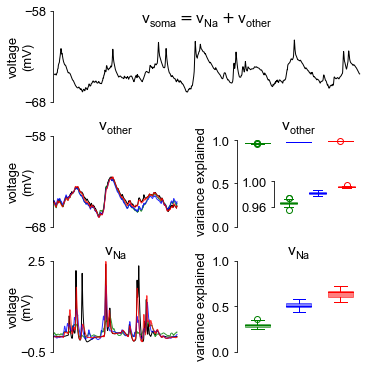

In [23]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '13'

fig = plt.figure(constrained_layout=True, figsize = (5,5))
gs = fig.add_gridspec(3,2, wspace=0.05, hspace=0.1)
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])

ax1.plot(np.arange(0,0.8,1/5000), true4_na[-1][17000:21000], linewidth=1, color="black")
ax1.margins(x=0.005, y=0.005)
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.spines.bottom.set_visible(False)
ax1.spines.left.set_bounds(-68,-58)
ax1.set_yticks([-68,-58])
ax1.set_xticks([])
ax1.set_ylabel("voltage\n(mV)", labelpad=-10)
ax1.set_title("$\mathregular{v_{soma}} = \mathregular{v_{Na}} + \mathregular{v_{other}}$", y=0.8)

ax2.plot(np.arange(0,0.4,1/5000), true4_nona[-1][18000:20000], linewidth=1, color="black", label="target")
ax2.plot(np.arange(0,0.4,1/5000), one4_nona_test[-1][18000:20000], linewidth=1, color="green", label="static", alpha=0.8)
ax2.plot(np.arange(0,0.4,1/5000), two4_nona_test[-1][18000:20000], linewidth=1, color="blue", label="static w/ multiplex", alpha=0.8)
ax2.plot(np.arange(0,0.4,1/5000), gru4_nona_test[-1][18000:20000], linewidth=1, color="red", label="dynamic", alpha=0.8)
ax2.margins(x=0.005, y=0.005)
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2.spines.left.set_bounds(-68,-58)
#ax2.legend(loc=(0.03,0.5), fontsize=11, frameon=False)
ax2.set_yticks([-68,-58])
ax2.set_xticks([])
ax2.set_ylabel("voltage\n(mV)", labelpad=-10)
ax2.set_title("$\mathregular{v_{other}}$")

ax4.plot(np.arange(0,0.4,1/5000), true4_diff[-1][18000:20000], linewidth=1, color="black")
ax4.plot(np.arange(0,0.4,1/5000), one4_diff_test[-1][18000:20000], linewidth=1, color="green", label="static", alpha=0.8)
ax4.plot(np.arange(0,0.4,1/5000), two4_diff_test[-1][18000:20000], linewidth=1, color="blue", label="static w/ multiplex", alpha=0.8)
ax4.plot(np.arange(0,0.4,1/5000), gru4_diff_test[-1][18000:20000], linewidth=1, color="red", label="dynamic", alpha=0.8)
ax4.margins(x=0.005, y=0.005)
ax4.spines.right.set_visible(False)
ax4.spines.top.set_visible(False)
ax4.spines.bottom.set_visible(False)
ax4.spines.left.set_bounds(-0.5,2.5)
ax4.set_yticks([-0.5,2.5])
ax4.set_xticks([])
ax4.set_ylabel("voltage\n(mV)", labelpad=-13)
ax4.set_title("$\mathregular{v_{Na}}$")

colors = ["green", "blue", "red"]
cap_colors = ["green", "green", "blue", "blue", "red", "red"]


# first boxplot pair
bp = ax3.boxplot(nona_var_exp_array.T, positions = [1,2,3], widths = 0.6, patch_artist=True)
for i in range(nona_var_exp_array.shape[0]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(nona_var_exp_array.shape[0]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
    
ax3.set_xticks([])
#ax3.set_xticklabels(["4", "8", "12"])
#ax3.set_xlabel("no. of clusters")
ax3.set_ylim(0,1.05)
ax3.margins(x=0.005, y=0.005)
ax3.spines.right.set_visible(False)
ax3.spines.top.set_visible(False)
ax3.spines.bottom.set_visible(False)
ax3.tick_params(axis="x", length=0)
ax3.set_title("$\mathregular{v_{other}}$")
ax3.set_ylabel("variance explained")
ax3.set_yticks(np.arange(0,1.01,0.5))
ax3.spines.left.set_bounds((0,1))

ins = ax3.inset_axes([0.3,0.15,0.7,0.35])
# first boxplot pair
bp = ins.boxplot(nona_var_exp_array.T, positions = [1,2,3], widths = 0.6, patch_artist=True)
for i in range(nona_var_exp_array.shape[0]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(nona_var_exp_array.shape[0]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
    
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.set_xticks([])
ins.set_ylim(0.95,1)
ins.set_yticks([0.96,1])
ins.spines.left.set_bounds((0.96,1))

# first boxplot pair
bp = ax5.boxplot(diff_var_exp_array.T, positions = [1,2,3], widths = 0.6, patch_artist=True)
for i in range(diff_var_exp_array.shape[0]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(diff_var_exp_array.shape[0]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
    
    
ax5.set_xticks([])
#ax5.set_xticklabels(["4", "8", "12"])
#ax5.set_xlabel("no. of clusters")
ax5.set_ylim(0,1)
ax5.margins(x=0.005, y=0.005)
ax5.spines.right.set_visible(False)
ax5.spines.top.set_visible(False)
ax5.set_title("$\mathregular{v_{Na}}$")
ax5.spines.bottom.set_visible(False)
ax5.tick_params(axis="x", length=0)
ax5.set_yticks(np.arange(0,1.01,0.5))
ax5.spines.left.set_bounds((0,1))
ax5.set_ylabel("variance explained")

fig.tight_layout()
#plt.show()
#fig.savefig("/home/sklee/dendrite/fig_cosyne/fig_cosyne_e.pdf", bbox_inches="tight", transparent=True)

# Panel F

In [10]:
true4_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy"))
true4_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[-20:,:50000]
true4_diff = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff_stimseed1_set1.npy")[-50000*20:].reshape(20,50000)

gru4_nona_hand = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"] + true4_nona_mean
gru4_nona_rand = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/rand/gru_s10_h20_output.npz")["test"] + true4_nona_mean
gru4_diff_hand = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]
gru4_diff_rand = np.load("/media/hdd01/sklee/CA1_clust4-60/rand/gru_s10_h20_output.npz")["test"]

na4_gru_hand = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]
na4_gru_global = np.load("/media/hdd01/sklee/CA1_clust4-60/global/gru_s1_h20_output.npz")["test"]

nona4_true = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[-20:,:50000]
nona4_gru_hand = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"]
nona4_gru_global = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/global/gru_s1_h20_output.npz")["test"]

In [31]:
diff_var_exp = np.zeros((4,20))
nona_var_exp = np.zeros((4,20))

for i in range(20):
    diff_var_exp[1,i] = explained_variance_score(true4_diff[i], gru4_diff_hand[i])
    diff_var_exp[0,i] = explained_variance_score(true4_diff[i], gru4_diff_rand[i])
    
    nona_var_exp[1,i] = explained_variance_score(true4_nona[i], gru4_nona_hand[i])
    nona_var_exp[0,i] = explained_variance_score(true4_nona[i], gru4_nona_rand[i])
    
    diff_var_exp[2,i] = explained_variance_score(true4_diff[i], na4_gru_global[i])
    diff_var_exp[3,i] = explained_variance_score(true4_diff[i], na4_gru_hand[i])

    nona_var_exp[2,i] = explained_variance_score(nona4_true[i], nona4_gru_global[i])
    nona_var_exp[3,i] = explained_variance_score(nona4_true[i], nona4_gru_hand[i])

/tmp/ipykernel_17127/3047235560.py:227: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


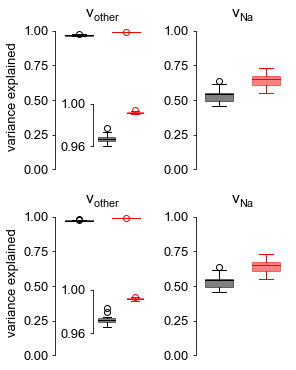

In [43]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '13'

fig = plt.figure(constrained_layout=True, figsize = (4,5))
gs = fig.add_gridspec(2,2, wspace=0.1, hspace=0.1)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

bp = ax1.boxplot(nona_var_exp[:2,:].T, positions = [1,2], widths = 0.6, patch_artist=True)
counter = 0
    
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for i in range(2):
    if i%2 == 1:
        plt.setp(bp["fliers"][i], markeredgecolor="red")
        plt.setp(bp["boxes"][i], color="red")
        plt.setp(bp["medians"][i], color="red")
    elif i%2 == 0:
        plt.setp(bp["fliers"][i], markeredgecolor="black")
        plt.setp(bp["boxes"][i], color="black")
        plt.setp(bp["medians"][i], color="black")
    
for i in range(2*2):
    if (i%4 == 2) or (i%4 == 3):
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
    elif (i%4 == 0) or (i%4 == 1):
        plt.setp(bp["whiskers"][i], color="black")
        plt.setp(bp["whiskers"][i], color="black")
        plt.setp(bp["caps"][i], color="black")
        plt.setp(bp["caps"][i], color="black")

ax1.set_ylim(0,1.05)
ax1.spines.left.set_bounds(0,1)
ax1.set_xticks([])
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.spines.bottom.set_visible(False)
ax1.set_ylabel("variance explained")
ax1.set_title("$\mathregular{v_{other}}$")

ins = ax1.inset_axes([0.4,0.15,0.6,0.3])
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
bp = ins.boxplot(nona_var_exp[:2,:].T, positions = [1,2], widths = 0.6, patch_artist=True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for i in range(2):
    if i%2 == 1:
        plt.setp(bp["fliers"][i], markeredgecolor="red")
        plt.setp(bp["boxes"][i], color="red")
        plt.setp(bp["medians"][i], color="red")
    elif i%2 == 0:
        plt.setp(bp["fliers"][i], markeredgecolor="black")
        plt.setp(bp["boxes"][i], color="black")
        plt.setp(bp["medians"][i], color="black")
    
for i in range(2*2):
    if (i%4 == 2) or (i%4 == 3):
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
    elif (i%4 == 0) or (i%4 == 1):
        plt.setp(bp["whiskers"][i], color="black")
        plt.setp(bp["whiskers"][i], color="black")
        plt.setp(bp["caps"][i], color="black")
        plt.setp(bp["caps"][i], color="black")

ins.tick_params(axis="x", length=0)
ins.set_xticks([])
ins.set_yticks([0.96,1])
ins.spines.left.set_bounds((0.96, 1))

bp = ax2.boxplot(diff_var_exp[2:,:].T, positions = [1,2], widths = 0.6, patch_artist=True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for i in range(2):
    if i%2 == 1:
        plt.setp(bp["fliers"][i], markeredgecolor="red")
        plt.setp(bp["boxes"][i], color="red")
        plt.setp(bp["medians"][i], color="red")
    elif i%2 == 0:
        plt.setp(bp["fliers"][i], markeredgecolor="black")
        plt.setp(bp["boxes"][i], color="black")
        plt.setp(bp["medians"][i], color="black")
for i in range(2*2):
    if (i%4 == 2) or (i%4 == 3):
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
    elif (i%4 == 0) or (i%4 == 1):
        plt.setp(bp["whiskers"][i], color="black")
        plt.setp(bp["whiskers"][i], color="black")
        plt.setp(bp["caps"][i], color="black")
        plt.setp(bp["caps"][i], color="black")

ax2.set_ylim(0,1.05)
ax2.spines.left.set_bounds(0,1)
ax2.set_xticks([])
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2.set_title("$\mathregular{v_{Na}}$")

bp = ax3.boxplot(nona_var_exp[2:,:].T, positions = [1,2], widths = 0.6, patch_artist=True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for i in range(2):
    if i%2 == 0:
        plt.setp(bp["fliers"][i], markeredgecolor="black")
        plt.setp(bp["boxes"][i], color="black")
        plt.setp(bp["medians"][i], color="black")
    elif i%2 == 1:
        plt.setp(bp["fliers"][i], markeredgecolor="red")
        plt.setp(bp["boxes"][i], color="red")
        plt.setp(bp["medians"][i], color="red")
    
for i in range(2*2):
    if (i%4 == 0) or (i%4 == 1):
        plt.setp(bp["whiskers"][i], color="black")
        plt.setp(bp["whiskers"][i], color="black")
        plt.setp(bp["caps"][i], color="black")
        plt.setp(bp["caps"][i], color="black")
    else:
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
        
ax3.set_ylim(0,1.05)
ax3.spines.left.set_bounds(0,1)
ax3.set_xticks([])
ax3.spines.right.set_visible(False)
ax3.spines.top.set_visible(False)
ax3.spines.bottom.set_visible(False)
ax3.set_ylabel("variance explained")
ax3.set_title("$\mathregular{v_{other}}$")

ins = ax3.inset_axes([0.4,0.15,0.6,0.3])
bp = ins.boxplot(nona_var_exp[2:,:].T, positions = [1,2], widths = 0.6, patch_artist=True)
#########
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for i in range(2):
    if i%2 == 0:
        plt.setp(bp["fliers"][i], markeredgecolor="black")
        plt.setp(bp["boxes"][i], color="black")
        plt.setp(bp["medians"][i], color="black")
    elif i%2 == 1:
        plt.setp(bp["fliers"][i], markeredgecolor="red")
        plt.setp(bp["boxes"][i], color="red")
        plt.setp(bp["medians"][i], color="red")
    
for i in range(2*2):
    if (i%4 == 0) or (i%4 == 1):
        plt.setp(bp["whiskers"][i], color="black")
        plt.setp(bp["whiskers"][i], color="black")
        plt.setp(bp["caps"][i], color="black")
        plt.setp(bp["caps"][i], color="black")
    else:
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
###########
ins.spines.right.set_visible(False)
ins.spines.top.set_visible(False)
ins.spines.bottom.set_visible(False)
ins.set_xticks([])
ins.set_ylim(0.96,1)
ins.set_yticks([0.96,1])
    
bp = ax4.boxplot(diff_var_exp[2:,:].T, positions = [1,2], widths = 0.6, patch_artist=True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for i in range(2):
    if i%2 == 0:
        plt.setp(bp["fliers"][i], markeredgecolor="black")
        plt.setp(bp["boxes"][i], color="black")
        plt.setp(bp["medians"][i], color="black")
    elif i%2 == 1:
        plt.setp(bp["fliers"][i], markeredgecolor="red")
        plt.setp(bp["boxes"][i], color="red")
        plt.setp(bp["medians"][i], color="red")
    
for i in range(2*2):
    if (i%4 == 0) or (i%4 == 1):
        plt.setp(bp["whiskers"][i], color="black")
        plt.setp(bp["whiskers"][i], color="black")
        plt.setp(bp["caps"][i], color="black")
        plt.setp(bp["caps"][i], color="black")
    else:
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
        plt.setp(bp["caps"][i], color="red")


ax4.set_ylim(0,1.05)
ax4.spines.left.set_bounds(0,1)
ax4.set_xticks([])
ax4.spines.right.set_visible(False)
ax4.spines.top.set_visible(False)
ax4.spines.bottom.set_visible(False)
ax4.set_title("$\mathregular{v_{Na}}$")

fig.tight_layout()
#plt.show()
#fig.savefig("/home/sklee/dendrite/fig_cosyne/fig_cosyne_f.pdf", bbox_inches="tight", transparent=True)

# Panel G

In [44]:
C4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set1.npz")["test"]
C4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set1.npz")["test"]
C4_diff_ref = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]
C4_nona_ref = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"]
C4_diff_true = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff_stimseed1_set1.npy")[-20*50000:].reshape(20,50000)
C4_nona_true = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[-20:,:50000]
C4_nona_rand = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/rand/gru_s10_h20_output.npz")["test"]
C4_diff_rand = np.load("/media/hdd01/sklee/CA1_clust4-60/rand/gru_s10_h20_output.npz")["test"]

In [64]:
var_exp_diff = np.zeros((20,3))
var_exp_nona = np.zeros((20,3))

for i in tnrange(20):
    var_exp_diff[i,2] = explained_variance_score(C4_diff_true[i], C4_diff_ref[i])
    var_exp_diff[i,1] = explained_variance_score(C4_diff_true[i], C4_diff_test[i])
    var_exp_diff[i,0] = explained_variance_score(C4_diff_true[i], C4_diff_rand[i])
        
    var_exp_nona[i,2] = explained_variance_score(C4_nona_true[i], C4_nona_ref[i])
    var_exp_nona[i,1] = explained_variance_score(C4_nona_true[i], C4_nona_test[i])
    var_exp_nona[i,0] = explained_variance_score(C4_nona_true[i], C4_nona_rand[i])
    
dist_corrs_weighted = np.asarray([[0.21495209, 0.05379234, 0.22909333, 0.34666287, 0.2527224],
                                [0.04619286, -0.03050962, -0.07270013,  0.046549, -0.05472012]]).T
clust_corrs_weighted = np.asarray([[0.13123523, 0.02813326, 0.09910648, -0.09201113, -0.12477522],
                                 [0.64845237, 0.63661348, 0.65866583, 0.6590108,  0.62365114]]).T

/tmp/ipykernel_17127/749751723.py:4: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(20):


  0%|          | 0/20 [00:00<?, ?it/s]

/tmp/ipykernel_17127/2592669441.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


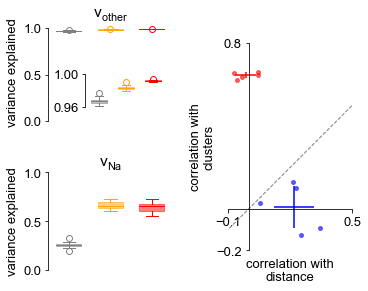

In [71]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '13'

fig = plt.figure(constrained_layout=True, figsize = (5,4))
gs = fig.add_gridspec(2,2, wspace=0.1, hspace=0.1)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[:,1])

colors=["gray", "orange", "red"]
box_colors=["gray", "orange", "red",
           "gray", "orange", "red",
           "gray", "orange", "red"]

bp = ax1.boxplot(var_exp_nona[:,:], positions = [1,2,3], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for i in range(3):
    if i%3 == 0:
        plt.setp(bp["fliers"][i], markeredgecolor="gray")
        plt.setp(bp["boxes"][i], color="gray")
        plt.setp(bp["medians"][i], color="gray")
    elif i%3 == 1:
        plt.setp(bp["fliers"][i], markeredgecolor="orange")
        plt.setp(bp["boxes"][i], color="orange")
        plt.setp(bp["medians"][i], color="orange")
    elif i%3 == 2:
        plt.setp(bp["fliers"][i], markeredgecolor="red")
        plt.setp(bp["boxes"][i], color="red")
        plt.setp(bp["medians"][i], color="red")
    
for i in range(3*2):
    if (i%6 == 0) or (i%6 == 1):
        plt.setp(bp["whiskers"][i], color="gray")
        plt.setp(bp["whiskers"][i], color="gray")
        plt.setp(bp["caps"][i], color="gray")
        plt.setp(bp["caps"][i], color="gray")
    elif (i%6 == 2) or (i%6 == 3):
        plt.setp(bp["whiskers"][i], color="orange")
        plt.setp(bp["whiskers"][i], color="orange")
        plt.setp(bp["caps"][i], color="orange")
        plt.setp(bp["caps"][i], color="orange")
    elif (i%6 == 4) or (i%6 == 5):
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
    
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis="x", length=0)
ax1.set_xticks([])
ax1.set_ylim(0,1.05)
ax1.spines.left.set_bounds((0, 1))
ax1.set_yticks([0,0.5,1])
ax1.set_title("$\mathregular{v_{other}}$")
ax1.set_ylabel("variance explained")

ins = ax1.inset_axes([0.3,0.15,0.65,0.5])
bp = ins.boxplot(var_exp_nona[:,:], positions = [1,2,3,], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for i in range(3):
    if i%3 == 0:
        plt.setp(bp["fliers"][i], markeredgecolor="gray")
        plt.setp(bp["boxes"][i], color="gray")
        plt.setp(bp["medians"][i], color="gray")
    elif i%3 == 1:
        plt.setp(bp["fliers"][i], markeredgecolor="orange")
        plt.setp(bp["boxes"][i], color="orange")
        plt.setp(bp["medians"][i], color="orange")
    elif i%3 == 2:
        plt.setp(bp["fliers"][i], markeredgecolor="red")
        plt.setp(bp["boxes"][i], color="red")
        plt.setp(bp["medians"][i], color="red")
    
for i in range(3*2):
    if (i%6 == 0) or (i%6 == 1):
        plt.setp(bp["whiskers"][i], color="gray")
        plt.setp(bp["whiskers"][i], color="gray")
        plt.setp(bp["caps"][i], color="gray")
        plt.setp(bp["caps"][i], color="gray")
    elif (i%6 == 2) or (i%6 == 3):
        plt.setp(bp["whiskers"][i], color="orange")
        plt.setp(bp["whiskers"][i], color="orange")
        plt.setp(bp["caps"][i], color="orange")
        plt.setp(bp["caps"][i], color="orange")
    elif (i%6 == 4) or (i%6 == 5):
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
    
ins.spines['right'].set_visible(False)
ins.spines['top'].set_visible(False)
ins.spines['bottom'].set_visible(False)
ins.tick_params(axis="x", length=0)
ins.set_xticks([])
ins.set_ylim(0.96,1.02)
ins.spines.left.set_bounds((0.96, 1))
ins.set_yticks([0.96,1])

bp = ax2.boxplot(var_exp_diff[:,:], positions = [1,2,3], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for i in range(3):
    if i%3 == 0:
        plt.setp(bp["fliers"][i], markeredgecolor="gray")
        plt.setp(bp["boxes"][i], color="gray")
        plt.setp(bp["medians"][i], color="gray")
    elif i%3 == 1:
        plt.setp(bp["fliers"][i], markeredgecolor="orange")
        plt.setp(bp["boxes"][i], color="orange")
        plt.setp(bp["medians"][i], color="orange")
    elif i%3 == 2:
        plt.setp(bp["fliers"][i], markeredgecolor="red")
        plt.setp(bp["boxes"][i], color="red")
        plt.setp(bp["medians"][i], color="red")
    
for i in range(3*2):
    if (i%6 == 0) or (i%6 == 1):
        plt.setp(bp["whiskers"][i], color="gray")
        plt.setp(bp["whiskers"][i], color="gray")
        plt.setp(bp["caps"][i], color="gray")
        plt.setp(bp["caps"][i], color="gray")
    elif (i%6 == 2) or (i%6 == 3):
        plt.setp(bp["whiskers"][i], color="orange")
        plt.setp(bp["whiskers"][i], color="orange")
        plt.setp(bp["caps"][i], color="orange")
        plt.setp(bp["caps"][i], color="orange")
    elif (i%6 == 4) or (i%6 == 5):
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["whiskers"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
        plt.setp(bp["caps"][i], color="red")
    
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_xticks([])
ax2.spines['bottom'].set_visible(False)
ax2.tick_params(axis="x", length=0)
ax2.set_ylim(0,1)
ax2.set_yticks([0,0.5,1])
ax2.set_title("$\mathregular{v_{Na}}$")
ax2.set_ylabel("variance explained")

ax3.scatter(dist_corrs_weighted[:,0], clust_corrs_weighted[:,0], s=15, color="blue", alpha=0.6)
ax3.scatter(dist_corrs_weighted[:,1], clust_corrs_weighted[:,1], s=15, color="red", alpha=0.6)
ax3.plot(np.linspace(-1,1,20), np.linspace(-1,1,20), linestyle="--", color="gray", linewidth=1)
ax3.set_xlim(-0.1,0.5)
ax3.set_ylim(-0.2,0.8)

ax3.set_ylabel("correlation with\nclusters", labelpad=0)
ax_error_list = [ax3, ax3]
error_color_list = ["blue", "red"]
for i in range(len(ax_error_list)):
    ax_error_list[i].errorbar(np.mean(dist_corrs_weighted[:,i]), np.mean(clust_corrs_weighted[:,i]),
               xerr=np.std(dist_corrs_weighted[:,i]), yerr=np.std(clust_corrs_weighted[:,i]),
                             color=error_color_list[i])

ax3.spines['left'].set_position(('data', 0.0))
ax3.spines['bottom'].set_position(('data', 0.0))
ax3.spines.right.set_visible(False)
ax3.spines.top.set_visible(False)
ax3.set_yticks([-0.2, 0.8])
ax3.set_xticks([-0.1, 0.5])
ax3.set_aspect('equal')
ax3.set_xlabel("correlation with\ndistance", labelpad=30)
ax3.set_aspect(1)
    
fig.tight_layout()
#plt.show()
#fig.savefig("/home/sklee/dendrite/fig_cosyne/fig_cosyne_g.pdf", bbox_inches="tight", transparent=True)